## This note book cointains new Models . this time I used Iterative Imputer to fill values.
### the accuracy cam out to be worser when submitting to competition.
### The new model accuracy is 0.083..
### The previos model acc is 0.080

In [1]:
# Importing Data
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from scipy.optimize import minimize

In [2]:
# Importing Data
pd.set_option('display.max_columns',None)

# training data
train = pd.read_csv('train.csv')

# test data
test = pd.read_csv('test.csv')
df=pd.concat([train,test], sort=False)
train.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.825369,46

In [3]:
# Converting Categorical to numeric
df["galaxy"] = df["galaxy"].astype('category')
df["galaxy"] = df["galaxy"].cat.codes

In [4]:
train = df[:3865]
test = df[3865:]
test=test.drop("y", axis = 1)
test_res= test.copy()

In [5]:
# From train set
train_gal=set(train["galaxy"])
s=0
for x in train_gal:
    s=s+len(train.loc[train['galaxy'] == x])
print("Total distinct galaxies: {}".format(len(train_gal)))
print("Average samples per galaxy: {}".format(s/len(train_gal)))

Total distinct galaxies: 181
Average samples per galaxy: 21.353591160220994


In [6]:
test_gal=set(test["galaxy"])
s=0
for x in test_gal:
    s=s+len(test.loc[test['galaxy'] == x])
print("Total distinct galaxies: {}".format(len(test_gal)))
print("Average samples per galaxy: {}".format(s/len(test_gal)))

Total distinct galaxies: 172
Average samples per galaxy: 5.174418604651163


In [7]:
print("Train Data shape :", train.shape)
print("Test Data shape :", test.shape)

Train Data shape : (3865, 80)
Test Data shape : (890, 79)


In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
test.columns

Index(['galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15–64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Life expect

In [15]:
# train.isna()
# train

In [10]:
train.isna().sum()

galactic year                                                                   0
galaxy                                                                          0
existence expectancy index                                                      1
existence expectancy at birth                                                   1
Gross income per capita                                                        28
                                                                             ... 
Adjusted net savings                                                         2953
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    2924
Private galaxy capital flows (% of GGP)                                      2991
Gender Inequality Index (GII)                                                3021
y                                                                               0
Length: 80, dtype: int64

In [12]:
new_train = train
# new_train

In [15]:
new_train = new_train.drop('y', axis=1)

In [16]:
imp = IterativeImputer(max_iter=10, random_state=0).fit(new_train)


E:\Softwares\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [17]:
imputed_X_train = imp.transform(new_train)
imputed_X_test  = imp.transform(test)

In [14]:
train['y']

0       0.052590
1       0.059868
2       0.050449
3       0.049394
4       0.154247
          ...   
3860    0.042324
3861    0.036725
3862    0.166271
3863    0.024187
3864    0.100069
Name: y, Length: 3865, dtype: float64

In [22]:
imputed_train_df = pd.DataFrame(imputed_X_train, columns= new_train.columns)

In [25]:
# imputed_train_df

In [27]:
convert_dict = {'galaxy': int,} 

In [28]:
imputed_train_df = imputed_train_df.astype(convert_dict)
imputed_train_df

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,990025.0,96,0.628657,63.125200,27109.234310,0.646039,8.240543,4.825527,0.544488,0.384368,175.994871,70.397542,66.940095,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.8

In [41]:
train_X_imputed = imputed_train_df.values

In [29]:
train_Y = train['y'].values

In [31]:
train_Y.shape

(3865,)

In [32]:
test_X_imputed_df = pd.DataFrame(imputed_X_test, columns=test.columns) 
test_X_imputed_df = test_X_imputed_df.astype(convert_dict)

In [33]:
test_X_imputed_df

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012.0,84,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,105.193088,64.241392,17.418350,1020.423987,56.511011,139.376388,95.277421,13.097276,649.568260,73.876837,61.124334,

In [34]:
test_X = test_X_imputed_df.values

In [35]:
len(test_X)

890

In [36]:
test_X.shape

(890, 79)

In [37]:
len(train_Y)

3865

In [42]:
train_X_imputed.shape

(3865, 79)

In [43]:
scaler = StandardScaler().fit(train_X_imputed)
scaled_X_train = scaler.transform(train_X_imputed)
scaled_X_test =  scaler.transform(test_X)

In [44]:
# imputed_train_df.isna().sum()
scaled_X_train

array([[-1.53847803,  0.11037723, -1.50203703, ...,  0.78287157,
         0.34884147,  1.18017805],
       [-1.53847803, -1.09101313, -0.33508528, ..., -0.52453783,
        -0.11022831,  0.91769967],
       [-1.53847803,  1.67409167, -1.31237869, ...,  0.23406191,
        -0.08199158,  1.721834  ],
       ...,
       [ 2.06592362, -1.07194344,  1.00828105, ..., -0.22304823,
         0.43195896, -1.80044919],
       [ 2.06592362,  0.05316817,  0.41003791, ..., -1.02122278,
         0.14707308,  0.36025678],
       [ 2.06592362,  0.66339819,  0.9842572 , ..., -0.27787568,
         0.30524066, -0.43551451]])

In [45]:
# importing Libraries
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential

## New Model trained

In [47]:
# deep Learning Model
def build_model():
    model = Sequential()

    # Input Layer
    model.add(Dense(256,kernel_initializer='normal', input_dim= scaled_X_train.shape[1], activation = 'relu' ))
    
    #Hidden Layers
    model.add(Dense(512, kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='normal',activation='relu'))
    

    # Output Layer
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mean_absolute_error', optimizer = optimizer, metrics=['mean_absolute_error',])
    return model

In [48]:
model = build_model()

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               20480     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5

In [51]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import matplotlib.pyplot as plt
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [52]:
# making Checkpoint foe models

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [54]:
history = model.fit(scaled_X_train, train_Y, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 3092 samples, validate on 773 samples
Epoch 1/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0803 - mean_absolute_error: 0.0803
Epoch 00001: val_loss improved from inf to 0.03790, saving model to Weights-001--0.03790.hdf5
3092/3092 [==============================] - 3s 890us/sample - loss: 0.0795 - mean_absolute_error: 0.0795 - val_loss: 0.0379 - val_mean_absolute_error: 0.0379
Epoch 2/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0294 - mean_absolute_error: 0.0294
Epoch 00002: val_loss improved from 0.03790 to 0.03124, saving model to Weights-002--0.03124.hdf5
3092/3092 [==============================] - 2s 654us/sample - loss: 0.0294 - mean_absolute_error: 0.0294 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312
Epoch 3/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 00003: val_loss improved from 0.03124 to 0.03002, saving model to Weights-003--0.03002.hdf5
3092/3092 [====

Epoch 25/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0128 - mean_absolute_error: 0.0128
Epoch 00025: val_loss improved from 0.02424 to 0.02266, saving model to Weights-025--0.02266.hdf5
3092/3092 [==============================] - 2s 577us/sample - loss: 0.0128 - mean_absolute_error: 0.0128 - val_loss: 0.0227 - val_mean_absolute_error: 0.0227
Epoch 26/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 00026: val_loss did not improve from 0.02266
3092/3092 [==============================] - 2s 626us/sample - loss: 0.0127 - mean_absolute_error: 0.0127 - val_loss: 0.0295 - val_mean_absolute_error: 0.0295
Epoch 27/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 00027: val_loss did not improve from 0.02266
3092/3092 [==============================] - 2s 589us/sample - loss: 0.0127 - mean_absolute_error: 0.0127 - val_loss: 0.0322 - val_mean_absolute_erro

Epoch 50/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0114 - mean_absolute_error: 0.0114
Epoch 00050: val_loss did not improve from 0.02140
3092/3092 [==============================] - 2s 582us/sample - loss: 0.0114 - mean_absolute_error: 0.0114 - val_loss: 0.0230 - val_mean_absolute_error: 0.0230
Epoch 51/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0111 - mean_absolute_error: 0.0111
Epoch 00051: val_loss did not improve from 0.02140
3092/3092 [==============================] - 3s 865us/sample - loss: 0.0111 - mean_absolute_error: 0.0111 - val_loss: 0.0279 - val_mean_absolute_error: 0.0279
Epoch 52/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0111 - mean_absolute_error: 0.0111
Epoch 00052: val_loss did not improve from 0.02140
3092/3092 [==============================] - 2s 675us/sample - loss: 0.0110 - mean_absolute_error: 0.0110 - val_loss: 0.0275 - val_mean_absolute_error: 0.0275
Epoch 53/500
3072/3092 [=============

Epoch 76/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0101 - mean_absolute_error: 0.0101- ETA: 1s - loss: 0.0097 - me
Epoch 00076: val_loss did not improve from 0.02140
3092/3092 [==============================] - 2s 624us/sample - loss: 0.0101 - mean_absolute_error: 0.0101 - val_loss: 0.0301 - val_mean_absolute_error: 0.0301
Epoch 77/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0102 - mean_absolute_error: 0.0102
Epoch 00077: val_loss did not improve from 0.02140
3092/3092 [==============================] - 2s 575us/sample - loss: 0.0102 - mean_absolute_error: 0.0102 - val_loss: 0.0220 - val_mean_absolute_error: 0.0220
Epoch 78/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0105 - mean_absolute_error: 0.0105- ETA: 0s - loss: 0.0105 - mean_absolute_error: 0.010
Epoch 00078: val_loss did not improve from 0.02140
3092/3092 [==============================] - 2s 611us/sample - loss: 0.0105 - mean_absolute_error: 0.0105 - val_lo

Epoch 101/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 00101: val_loss did not improve from 0.02134
3092/3092 [==============================] - 2s 585us/sample - loss: 0.0099 - mean_absolute_error: 0.0099 - val_loss: 0.0235 - val_mean_absolute_error: 0.0235
Epoch 102/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.0096
Epoch 00102: val_loss did not improve from 0.02134
3092/3092 [==============================] - 2s 570us/sample - loss: 0.0095 - mean_absolute_error: 0.0095 - val_loss: 0.0219 - val_mean_absolute_error: 0.0219
Epoch 103/500
2976/3092 [===========================>..] - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 00103: val_loss did not improve from 0.02134
3092/3092 [==============================] - 2s 581us/sample - loss: 0.0097 - mean_absolute_error: 0.0097 - val_loss: 0.0235 - val_mean_absolute_error: 0.0235
Epoch 104/500
3040/3092 [=========

Epoch 126/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.0092
Epoch 00126: val_loss did not improve from 0.02134
3092/3092 [==============================] - 2s 552us/sample - loss: 0.0092 - mean_absolute_error: 0.0092 - val_loss: 0.0233 - val_mean_absolute_error: 0.0233
Epoch 127/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 00127: val_loss did not improve from 0.02134
3092/3092 [==============================] - 2s 591us/sample - loss: 0.0093 - mean_absolute_error: 0.0093 - val_loss: 0.0243 - val_mean_absolute_error: 0.0243
Epoch 128/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.0092
Epoch 00128: val_loss did not improve from 0.02134
3092/3092 [==============================] - 2s 581us/sample - loss: 0.0092 - mean_absolute_error: 0.0092 - val_loss: 0.0247 - val_mean_absolute_error: 0.0247
Epoch 129/500
3008/3092 [=========

Epoch 151/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0090 - mean_absolute_error: 0.0090
Epoch 00151: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 565us/sample - loss: 0.0090 - mean_absolute_error: 0.0090 - val_loss: 0.0246 - val_mean_absolute_error: 0.0246
Epoch 152/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.0089
Epoch 00152: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 574us/sample - loss: 0.0089 - mean_absolute_error: 0.0089 - val_loss: 0.0273 - val_mean_absolute_error: 0.0273
Epoch 153/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.0089
Epoch 00153: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 581us/sample - loss: 0.0089 - mean_absolute_error: 0.0089 - val_loss: 0.0259 - val_mean_absolute_error: 0.0259
Epoch 154/500
2976/3092 [=========

3072/3092 [============================>.] - ETA: 0s - loss: 0.0088 - mean_absolute_error: 0.0088
Epoch 00176: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 773us/sample - loss: 0.0088 - mean_absolute_error: 0.0088 - val_loss: 0.0253 - val_mean_absolute_error: 0.0253
Epoch 177/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0085 - mean_absolute_error: 0.0085
Epoch 00177: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 633us/sample - loss: 0.0085 - mean_absolute_error: 0.0085 - val_loss: 0.0230 - val_mean_absolute_error: 0.0230
Epoch 178/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0088 - mean_absolute_error: 0.0088
Epoch 00178: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 705us/sample - loss: 0.0088 - mean_absolute_error: 0.0088 - val_loss: 0.0225 - val_mean_absolute_error: 0.0225
Epoch 179/500
3008/3092 [=======================

3040/3092 [============================>.] - ETA: 0s - loss: 0.0082 - mean_absolute_error: 0.0082
Epoch 00201: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 589us/sample - loss: 0.0082 - mean_absolute_error: 0.0082 - val_loss: 0.0223 - val_mean_absolute_error: 0.0223
Epoch 202/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0081 - mean_absolute_error: 0.0081
Epoch 00202: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 707us/sample - loss: 0.0081 - mean_absolute_error: 0.0081 - val_loss: 0.0229 - val_mean_absolute_error: 0.0229
Epoch 203/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0082 - mean_absolute_error: 0.0082- ETA: 1s - loss: 0.0078 - mean_abs - ETA: 0s - loss: 0.0083 - mean_absolute_error
Epoch 00203: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 786us/sample - loss: 0.0082 - mean_absolute_error: 0.0082 - val_loss: 0.0231 

3040/3092 [============================>.] - ETA: 0s - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 00226: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 650us/sample - loss: 0.0084 - mean_absolute_error: 0.0084 - val_loss: 0.0239 - val_mean_absolute_error: 0.0239
Epoch 227/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0083 - mean_absolute_error: 0.0083
Epoch 00227: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 697us/sample - loss: 0.0083 - mean_absolute_error: 0.0083 - val_loss: 0.0255 - val_mean_absolute_error: 0.0255
Epoch 228/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0081 - mean_absolute_error: 0.0081
Epoch 00228: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 770us/sample - loss: 0.0081 - mean_absolute_error: 0.0081 - val_loss: 0.0228 - val_mean_absolute_error: 0.0228
Epoch 229/500
3008/3092 [=======================

Epoch 251/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0079 - mean_absolute_error: 0.0079
Epoch 00251: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 714us/sample - loss: 0.0079 - mean_absolute_error: 0.0079 - val_loss: 0.0235 - val_mean_absolute_error: 0.0235
Epoch 252/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0081 - mean_absolute_error: 0.0081
Epoch 00252: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 753us/sample - loss: 0.0081 - mean_absolute_error: 0.0081 - val_loss: 0.0267 - val_mean_absolute_error: 0.0267
Epoch 253/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0082 - mean_absolute_error: 0.0082
Epoch 00253: val_loss did not improve from 0.02035
3092/3092 [==============================] - 3s 871us/sample - loss: 0.0081 - mean_absolute_error: 0.0081 - val_loss: 0.0220 - val_mean_absolute_error: 0.0220
Epoch 254/500
3072/3092 [=========

3040/3092 [============================>.] - ETA: 0s - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 00276: val_loss did not improve from 0.02035
3092/3092 [==============================] - 3s 904us/sample - loss: 0.0076 - mean_absolute_error: 0.0076 - val_loss: 0.0267 - val_mean_absolute_error: 0.0267
Epoch 277/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0077 - mean_absolute_error: 0.0077- ETA: 0s - loss: 0.0077 - mean_absolute_er
Epoch 00277: val_loss did not improve from 0.02035
3092/3092 [==============================] - 3s 893us/sample - loss: 0.0077 - mean_absolute_error: 0.0077 - val_loss: 0.0237 - val_mean_absolute_error: 0.0237
Epoch 278/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 00278: val_loss did not improve from 0.02035
3092/3092 [==============================] - 3s 860us/sample - loss: 0.0078 - mean_absolute_error: 0.0078 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245
Epoch

Epoch 301/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 00301: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 657us/sample - loss: 0.0075 - mean_absolute_error: 0.0075 - val_loss: 0.0233 - val_mean_absolute_error: 0.0233
Epoch 302/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 00302: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 675us/sample - loss: 0.0076 - mean_absolute_error: 0.0076 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260
Epoch 303/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 00303: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 763us/sample - loss: 0.0077 - mean_absolute_error: 0.0077 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269
Epoch 304/500
3008/3092 [=========

Epoch 326/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0074 - mean_absolute_error: 0.0074- ETA: 1s - loss: 0.0081 - mean_ab
Epoch 00326: val_loss did not improve from 0.02035
3092/3092 [==============================] - 3s 848us/sample - loss: 0.0074 - mean_absolute_error: 0.0074 - val_loss: 0.0250 - val_mean_absolute_error: 0.0250
Epoch 327/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0072 - mean_absolute_error: 0.0072
Epoch 00327: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 803us/sample - loss: 0.0072 - mean_absolute_error: 0.0072 - val_loss: 0.0235 - val_mean_absolute_error: 0.0235
Epoch 328/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 00328: val_loss did not improve from 0.02035
3092/3092 [==============================] - 3s 810us/sample - loss: 0.0076 - mean_absolute_error: 0.0076 - val_loss: 0.0272 - val_mean_absolute_error: 0.0272


3040/3092 [============================>.] - ETA: 0s - loss: 0.0072 - mean_absolute_error: 0.0072
Epoch 00351: val_loss did not improve from 0.02035
3092/3092 [==============================] - 4s 1ms/sample - loss: 0.0072 - mean_absolute_error: 0.0072 - val_loss: 0.0254 - val_mean_absolute_error: 0.0254
Epoch 352/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 00352: val_loss did not improve from 0.02035
3092/3092 [==============================] - 3s 990us/sample - loss: 0.0073 - mean_absolute_error: 0.0073 - val_loss: 0.0235 - val_mean_absolute_error: 0.0235
Epoch 353/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 00353: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 770us/sample - loss: 0.0073 - mean_absolute_error: 0.0073 - val_loss: 0.0224 - val_mean_absolute_error: 0.0224
Epoch 354/500
3072/3092 [=========================

3008/3092 [============================>.] - ETA: 0s - loss: 0.0071 - mean_absolute_error: 0.0071
Epoch 00376: val_loss did not improve from 0.02035
3092/3092 [==============================] - 3s 857us/sample - loss: 0.0071 - mean_absolute_error: 0.0071 - val_loss: 0.0267 - val_mean_absolute_error: 0.0267
Epoch 377/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 00377: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 783us/sample - loss: 0.0070 - mean_absolute_error: 0.0070 - val_loss: 0.0277 - val_mean_absolute_error: 0.0277
Epoch 378/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 00378: val_loss did not improve from 0.02035
3092/3092 [==============================] - 3s 810us/sample - loss: 0.0074 - mean_absolute_error: 0.0074 - val_loss: 0.0271 - val_mean_absolute_error: 0.0271
Epoch 379/500
3072/3092 [=======================

3072/3092 [============================>.] - ETA: 0s - loss: 0.0072 - mean_absolute_error: 0.0072
Epoch 00401: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 783us/sample - loss: 0.0072 - mean_absolute_error: 0.0072 - val_loss: 0.0234 - val_mean_absolute_error: 0.0234
Epoch 402/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0071 - mean_absolute_error: 0.0071
Epoch 00402: val_loss did not improve from 0.02035
3092/3092 [==============================] - 4s 1ms/sample - loss: 0.0071 - mean_absolute_error: 0.0071 - val_loss: 0.0243 - val_mean_absolute_error: 0.0243
Epoch 403/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0071 - mean_absolute_error: 0.0071- ETA: 2s - loss: 0.0
Epoch 00403: val_loss did not improve from 0.02035
3092/3092 [==============================] - 4s 1ms/sample - loss: 0.0071 - mean_absolute_error: 0.0071 - val_loss: 0.0232 - val_mean_absolute_error: 0.0232
Epoch 404/500
3040/3092 [======

3008/3092 [============================>.] - ETA: 0s - loss: 0.0072 - mean_absolute_error: 0.0072
Epoch 00426: val_loss did not improve from 0.02035
3092/3092 [==============================] - 3s 836us/sample - loss: 0.0072 - mean_absolute_error: 0.0072 - val_loss: 0.0264 - val_mean_absolute_error: 0.0264
Epoch 427/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 00427: val_loss did not improve from 0.02035
3092/3092 [==============================] - 3s 866us/sample - loss: 0.0068 - mean_absolute_error: 0.0068 - val_loss: 0.0274 - val_mean_absolute_error: 0.0274
Epoch 428/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0070 - mean_absolute_error: 0.0070- ETA: 1s - loss: 0.0077 - mea
Epoch 00428: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 789us/sample - loss: 0.0070 - mean_absolute_error: 0.0070 - val_loss: 0.0268 - val_mean_absolute_error: 0.0268
Epoch 429/500
3008

3040/3092 [============================>.] - ETA: 0s - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 00451: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 739us/sample - loss: 0.0070 - mean_absolute_error: 0.0070 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269
Epoch 452/500
3040/3092 [============================>.] - ETA: 0s - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 00452: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 735us/sample - loss: 0.0070 - mean_absolute_error: 0.0070 - val_loss: 0.0222 - val_mean_absolute_error: 0.0222
Epoch 453/500
3072/3092 [============================>.] - ETA: 0s - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 00453: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 687us/sample - loss: 0.0068 - mean_absolute_error: 0.0068 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309
Epoch 454/500
3072/3092 [=======================

3040/3092 [============================>.] - ETA: 0s - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 00476: val_loss did not improve from 0.02035
3092/3092 [==============================] - 3s 879us/sample - loss: 0.0070 - mean_absolute_error: 0.0070 - val_loss: 0.0248 - val_mean_absolute_error: 0.0248
Epoch 477/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0068 - mean_absolute_error: 0.0068- ETA: 1s - loss: 0.0071 -
Epoch 00477: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 808us/sample - loss: 0.0068 - mean_absolute_error: 0.0068 - val_loss: 0.0235 - val_mean_absolute_error: 0.0235
Epoch 478/500
3008/3092 [============================>.] - ETA: 0s - loss: 0.0069 - mean_absolute_error: 0.0069
Epoch 00478: val_loss did not improve from 0.02035
3092/3092 [==============================] - 2s 688us/sample - loss: 0.0069 - mean_absolute_error: 0.0069 - val_loss: 0.0296 - val_mean_absolute_error: 0.0296
Epoch 479/500
3008/309

In [55]:
# Evaluating Model
from sklearn.metrics import mean_squared_error
from math import sqrt

In [56]:
pred_train = model.predict(scaled_X_train)
print("RMSE on Train Dataset: ",np.sqrt(mean_squared_error(train_Y,pred_train)))


RMSE on Train Dataset:  0.026356956911634186


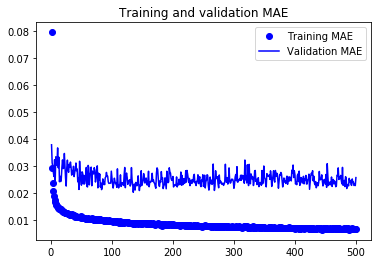

<Figure size 432x288 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()
plt.show()

## Predictions from New Model

In [58]:
predict_new_model = model.predict(scaled_X_test)

In [61]:
new_predict = pd.Series(predict_new_model.flatten())

In [62]:
new_predict

0      0.045780
1      0.044365
2      0.044424
3      0.044108
4      0.044594
         ...   
885    0.059039
886    0.048876
887    0.059113
888    0.058645
889    0.053887
Length: 890, dtype: float32

In [63]:
def submission(predict):
    index = predict

    pot_inc = -np.log(index+0.01)+3
    p2= pot_inc**2
    my_submission = pd.DataFrame({
    'Index':test.index,
    'pred': predict,
    'opt_pred':0,
    'eei':test['existence expectancy index'],})

    my_submission.loc[p2.nlargest(400).index, 'opt_pred']=100
    my_submission=my_submission.sort_values('pred')
    my_submission.iloc[400:600].opt_pred = 50
    my_submission=my_submission.sort_index()

    increase = (my_submission['opt_pred']*p2)/1000
    
    my_submission[['Index', 'pred', 'opt_pred']].to_csv('submission.csv', index=False)

In [64]:
submission(new_predict)

E:\Softwares\Anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Below is previous Model

In [77]:
# EPOCHS = 500
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# early_history = model.fit(scaled_X_train, train_Y, 
#                     epochs=EPOCHS, validation_split = 0.2, verbose=0, 
#                     callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0824,  mean_absolute_error:0.0824,  mse:0.1100,  val_loss:0.0385,  val_mean_absolute_error:0.0385,  val_mse:0.0054,  
............................

Text(0, 0.5, 'MAE [MPG]')

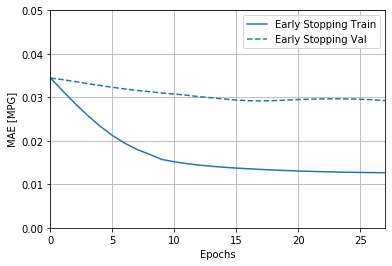

In [78]:
plotter.plot({'Early Stopping': early_history}, metric = "mean_absolute_error")
plt.ylim([0, 0.05])
plt.ylabel('MAE [MPG]')

In [51]:
# test

In [79]:
# Evaluating Model
from sklearn.metrics import mean_squared_error
from math import sqrt

In [80]:
pred_train = model.predict(scaled_X_train)
print("RMSE on Train Dataset: ",np.sqrt(mean_squared_error(train_Y,pred_train)))


RMSE on Train Dataset:  0.0327248316422674


In [68]:
early_history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mse', 'val_loss', 'val_mean_absolute_error', 'val_mse'])

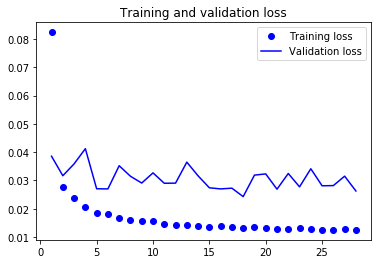

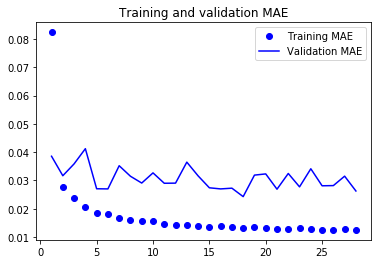

In [81]:
loss = early_history.history['loss']
val_loss = early_history.history['val_loss']
mae = early_history.history['mean_absolute_error']
val_mae = early_history.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()
plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.show()

In [82]:
predictions_from_model = model.predict(scaled_X_test)

In [83]:
predictions_from_model

array([[0.04386659],
       [0.04115997],
       [0.04170145],
       [0.04292755],
       [0.041997  ],
       [0.04189117],
       [0.04184289],
       [0.04447562],
       [0.04414085],
       [0.04465883],
       [0.04270079],
       [0.04147471],
       [0.04526902],
       [0.04296589],
       [0.0415998 ],
       [0.04423746],
       [0.04062844],
       [0.04280908],
       [0.04175076],
       [0.04303192],
       [0.043855  ],
       [0.04241766],
       [0.04344038],
       [0.04036644],
       [0.04455454],
       [0.04330336],
       [0.04217086],
       [0.04200142],
       [0.0434361 ],
       [0.04394896],
       [0.04404897],
       [0.04250951],
       [0.04337725],
       [0.04376077],
       [0.04057663],
       [0.04338797],
       [0.04450623],
       [0.0410819 ],
       [0.04320553],
       [0.04318337],
       [0.04468038],
       [0.04266976],
       [0.04220483],
       [0.04440349],
       [0.04357933],
       [0.04320431],
       [0.04304657],
       [0.040

In [84]:
predict = pd.Series(predictions_from_model.flatten())

In [85]:
predict

0      0.043867
1      0.041160
2      0.041701
3      0.042928
4      0.041997
         ...   
885    0.048624
886    0.048252
887    0.048630
888    0.048605
889    0.048471
Length: 890, dtype: float32

## Submissions

In [88]:
# def make_submission(predictions):
index = predict

pot_inc = -np.log(index+0.01)+3
p2= pot_inc**2
my_submission = pd.DataFrame({
'Index':test.index,
'pred': predict,
'opt_pred':0,
'eei':test['existence expectancy index'],})

my_submission.loc[p2.nlargest(400).index, 'opt_pred']=100
my_submission=my_submission.sort_values('pred')
my_submission.iloc[400:600].opt_pred = 50
my_submission=my_submission.sort_index()

increase = (my_submission['opt_pred']*p2)/1000

In [89]:
print(sum(increase), my_submission.loc[my_submission.eei < 0.7, 'opt_pred'].sum(), my_submission['opt_pred'].sum())


1708.863765430452 6600 50000


In [90]:
my_submission[['Index', 'pred', 'opt_pred']].to_csv('submission.csv', index=False)

In [57]:
# scaled_train_df